## Практическое задание №1. Реализация линейной регрессии с градиентным спуском

Модель линейной регрессии 

f(x) = y_pred = weights * X + bias

weights - вектор весов

bias - смещение

Функция потерь MSE:

MSE = (1/m)*(sum(f(x_i)-y_i)^2)

Обновление параметров с помощью градиентного спуска: 

weight_j = weight_j - learning_rate * (1/m) · sum((y_i − y_pred) · x_j^(i))

bias  = bias - learning_rate * (1/m) · sum(y_i − y_pred)

m - количество объектов

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
class LinearRegression() :

    def __init__(self, learning_rate, iterations) :
        # не забудьте сохранить параметры во внутренние переменны
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = 0
        self.X = None
        self.Y = None

    def fit(self, X, Y) :
        # классический метод для тренировки
        self.X = np.array(X)
        self.Y = np.array(Y)
        if self.X.ndim == 1:
            self.X = self.X.reshape(-1, 1)

        self.weights = np.zeros(self.X.shape[1])
        self.bias = 0        


        for _ in range(self.iterations) :
            self.update_weights()
            
        return self

    def update_weights( self ) :
        y_pred = self.X.dot(self.weights) + self.bias
        self.weights = self.weights + self.learning_rate * ((1/self.X.shape[0]) * self.X.T.dot((self.Y - y_pred)))
        self.bias = self.bias + self.learning_rate * ((1/self.X.shape[0]) * np.sum((self.Y - y_pred)))
        return self.weights, self.bias
    
    def predict( self, X ) :
        X = np.array(X)
        return X.dot(self.weights) + self.bias



df = pd.read_csv('salary_data.csv')

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X, Y)

Y_pred = model.predict(X)

print(*np.round(model.weights, 2))
print(np.round(model.bias, 2))


9876.11
22920.49


#### Проверка работы модели

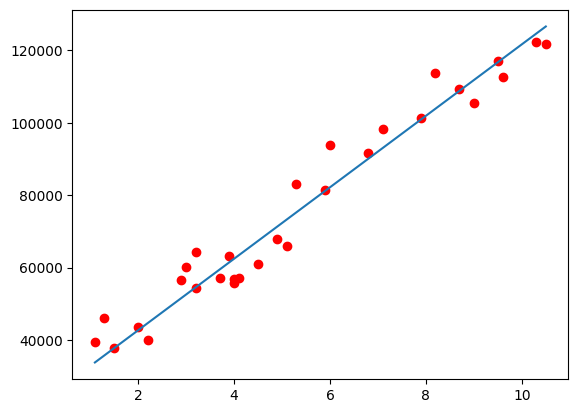

In [9]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, Y_pred)
plt.show()